**DATA ANALYTICS-II**
## 1. Problem Statement
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

**Import libraries and create alias for Pandas, Numpy**

In [6]:
import pandas as pd
import numpy as np

## 2. Data Collection
### Loading the data

In [7]:
df=pd.read_csv("../datasets/Social_Network_Ads.csv")


## 3. Exploratory Data Analysis
**Data Preprocessing:**

In [8]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


## 4. Feature Engineering
**Outlier Detection and Removal:**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

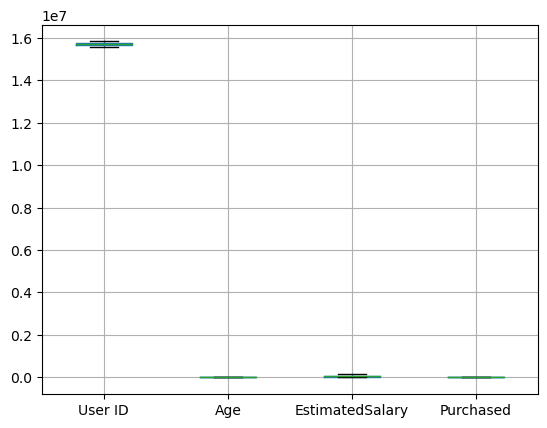

In [13]:
df.boxplot()

In [14]:
male = pd.get_dummies(df.Gender)
male

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [15]:
male.drop("Female", inplace=True, axis=1)

In [16]:
df_new = pd.concat([df, male], axis=1)
df_new

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19.0,19000.0,0,1
1,15810944,Male,35.0,20000.0,0,1
2,15668575,Female,26.0,43000.0,0,0
3,15603246,Female,27.0,57000.0,0,0
4,15804002,Male,19.0,76000.0,0,1
...,...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1,0
396,15706071,Male,51.0,23000.0,1,1
397,15654296,Female,50.0,20000.0,1,0
398,15755018,Male,36.0,33000.0,0,1


In [17]:
df_new.drop("Gender", inplace=True, axis=1)

In [18]:
df_new

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19.0,19000.0,0,1
1,15810944,35.0,20000.0,0,1
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,0,1
...,...,...,...,...,...
395,15691863,46.0,41000.0,1,0
396,15706071,51.0,23000.0,1,1
397,15654296,50.0,20000.0,1,0
398,15755018,36.0,33000.0,0,1


In [19]:
X = df_new.drop(['Purchased'], axis = 1)
Y = df_new['Purchased']

## 5. Model Building and Training


In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.2,random_state = 0)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression()

In [23]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

 **Predict the y_pred for all values of and test_x**

In [24]:
y_pred=logreg.predict(xtest)

In [25]:
print(xtrain)
print("------------\n")
print(xtest)
print("------------\n")
print(ytrain)
print("------------\n")
print(ytest)
print("------------\n")
print(y_pred)

      User ID   Age  EstimatedSalary  Male
336  15664907  58.0         144000.0     1
64   15605000  59.0          83000.0     0
55   15649136  24.0          55000.0     0
106  15706185  26.0          35000.0     0
300  15736397  58.0          38000.0     0
..        ...   ...              ...   ...
323  15619465  48.0          30000.0     0
192  15779581  29.0          43000.0     1
117  15591433  36.0          52000.0     1
47   15776348  27.0          54000.0     0
172  15794661  26.0         118000.0     0

[320 rows x 4 columns]
------------

      User ID   Age  EstimatedSalary  Male
132  15725660  30.0          87000.0     1
309  15652400  38.0          50000.0     0
341  15776844  35.0          75000.0     1
196  15738448  30.0          79000.0     0
246  15638003  35.0          50000.0     0
..        ...   ...              ...   ...
14   15628972  18.0          82000.0     1
363  15768293  42.0          79000.0     0
304  15598070  40.0          60000.0     0
361  15778830  5

## 6. Model Evaluation
**Find the Following Parameters for Logistic Regression on** **Social_Networking_Ads dataset:**
**1. Classification Report**
**2. Accuracy Score**
**3. Confusion Matrix**
**4. Error Rate**
**5. Precision**
**6. Recall**

In [26]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score, classification_report

**Confusion Matrix**

In [27]:
cm= confusion_matrix(ytest, y_pred)
cm

array([[56,  2],
       [12, 10]], dtype=int64)

**accuracy_score**

In [28]:
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.825


 **Precision**

In [29]:
ps = precision_score(ytest, y_pred)

In [30]:
ps

0.8333333333333334

**Recall score**

In [31]:
rs = recall_score(ytest, y_pred)

In [32]:
rs


0.45454545454545453

*Error Rate**

In [33]:
error_rate = 1- accuracy_score(ytest, y_pred)

In [34]:
error_rate

0.17500000000000004

**Classification Report**

In [35]:
print("classification report: ",classification_report(ytest, y_pred))

classification report:                precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80

